# Importing Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Objective

Develop a model To predict the market price of various crops across different Indian states using agricultural, climatic, and soil data. The model aims to help farmers, traders, and policymakers make informed decisions regarding crop selection, cultivation practices, and pricing strategies.

# Importing the dataset

In [63]:
dataset = pd.read_csv('crop_price_Data.csv')

In [64]:
dataset.shape

(5373, 11)

# EDA (Exploratory Data Analysis)

| Column               | Description                       | Unit / Category                                                                           |
| -------------------- | --------------------------------- | ----------------------------------------------------------------------------------------- |
| **Crop**             | Name of the crop                  | Categorical (e.g., Rice, Cotton)                                                          |
| **Season**           | Growing season                    | Categorical (Kharif, Rabi, etc.)                                                          |
| **State**            | State in India                    | Categorical                                                                               |
| **Area**             | Cultivated area for that crop     | **Hectares**                                                                              |
| **Soil Type**        | Soil classification               | Categorical (e.g., Black Soil, Alluvial Soil)                                             |
| **Pesticide Usage**  | Level of pesticide application    | Categorical (Low, Medium, High)                                                           |
| **pH**               | Soil acidity/alkalinity level     | Categorical here (Low, Average, High)                                                     |
| **Temperature**      | Temperature during growing period | Categorical (Low, Medium, High) — *could be converted to °C if numeric data is available* |
| **Fertilizer Usage** | Level of fertilizer applied       | Categorical (Low, Medium, High)                                                           |
| **Price**            | Market price of the crop          | **₹ per quintal** (likely)                                                                |
| **Rainfall**         | Annual rainfall in that region    | **mm**                                                                                    |


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              5373 non-null   object 
 1   Season            5373 non-null   object 
 2   State             5373 non-null   object 
 3   Area              5373 non-null   float64
 4   Soil Type         5373 non-null   object 
 5   Pesticide Usage   5373 non-null   object 
 6   pH                5373 non-null   object 
 7   Temperature       5373 non-null   object 
 8   Fertilizer Usage  5373 non-null   object 
 9   Price             5373 non-null   float64
 10  Rainfall          5373 non-null   float64
dtypes: float64(3), object(8)
memory usage: 461.9+ KB


Crop,season,State, soil Type,Pesticide usage,pH,Temperature,Fertilizer usage column data type is object , so label encoder must be used

In [66]:
print(dataset['Crop'].nunique())
print(dataset['Crop'].unique())

9
['Cotton(lint)' 'Onion' 'Potato' 'Rice' 'Sugarcane' 'Wheat' 'Groundnut'
 'Ragi' 'Banana']


Cotton(lint) → 1  
Onion        → 3  
Potato       → 4  
Rice         → 6  
Sugarcane    → 7  
Wheat        → 8  
Groundnut    → 2  
Ragi         → 5  
Banana       → 0  


In [67]:
print(dataset['Season'].nunique())
print(dataset['Season'].unique())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Summer     ' 'Winter     '
 'Rabi       ']


Autumn      → 0
Kharif      → 1
Rabi        → 2
Summer      → 3
Whole Year  → 4
Winter      → 5


In [68]:
print(dataset['State'].nunique())
print(dataset['State'].unique())

30
['Assam' 'Karnataka' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa' 'Kerala'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' 'Delhi' 'Manipur' 'Jammu and Kashmir' 'Telangana'
 'Arunachal Pradesh' 'Sikkim']


Andhra Pradesh      → 0

Arunachal Pradesh   → 1

Assam               → 2

Bihar               → 3

Chhattisgarh        → 4

Delhi               → 5

Goa                 → 6

Gujarat             → 7

Haryana             → 8

Himachal Pradesh    → 9

Jammu and Kashmir   → 10

Jharkhand           → 11

Karnataka           → 12

Kerala              → 13

Madhya Pradesh      → 14

Maharashtra         → 15

Manipur             → 16

Meghalaya           → 17

Mizoram             → 18

Nagaland            → 19

Odisha              → 20

Punjab              → 21

Puducherry          → 22

Sikkim              → 23

Tamil Nadu          → 24

Telangana           → 25

Tripura             → 26

Uttar Pradesh       → 27

Uttarakhand         → 28

West Bengal         → 29


In [69]:
print(dataset['Soil Type'].nunique())
print(dataset['Soil Type'].unique())

4
['Black Soil' 'Alluvial Soil' 'Laterile Soil' 'Red/Yellow Soil']


Alluvial Soil      → 0

Black Soil         → 1

Laterile Soil      → 2

Red/Yellow Soil    → 3


In [70]:
print(dataset['Pesticide Usage'].nunique())
print(dataset['Pesticide Usage'].unique())

2
['low' 'high']


high → 0

low → 1

In [71]:
print(dataset['Fertilizer Usage'].nunique())
print(dataset['Fertilizer Usage'].unique())

3
['High' 'Medium' 'Low']


High → 0

Low → 1

Medium → 2


In [72]:
print(dataset['pH'].nunique())
print(dataset['pH'].unique())

3
['Average' 'Low' 'High']


'Average' → 0

'High' → 1

'Low' → 2

In [73]:
print(dataset['Temperature'].nunique())
print(dataset['Temperature'].unique())

3
['Medium' 'Low' 'High']


High → 0

Low → 1

Medium → 2

In [74]:
dataset.head()

,Crop,Season,State,Area,Soil Type,Pesticide Usage,pH,Temperature,Fertilizer Usage,Price,Rainfall
0,Cotton(lint),Kharif,Assam,1739.0,Black Soil,low,Average,Medium,High,2490.092421,3373.2
1,Onion,Whole Year,Assam,7832.0,Alluvial Soil,high,Low,Low,Medium,2348.904922,3520.7
2,Potato,Whole Year,Assam,75259.0,Laterile Soil,low,Average,High,High,2448.287513,2957.4
3,Rice,Autumn,Assam,607358.0,Alluvial Soil,low,Low,High,High,2714.419518,3079.6
4,Rice,Summer,Assam,174974.0,Black Soil,high,Low,Low,Low,2883.356997,2566.7


**Encoding data using Label Encoder**

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Crop'] = le.fit_transform(dataset['Crop'])
dataset['Season'] = le.fit_transform(dataset['Season'])
dataset['State'] = le.fit_transform(dataset['State'])
dataset['Soil Type'] = le.fit_transform(dataset['Soil Type'])
dataset['Pesticide Usage'] = le.fit_transform(dataset['Pesticide Usage'])
dataset['pH'] = le.fit_transform(dataset['pH'])
dataset['Temperature'] = le.fit_transform(dataset['Temperature'])
dataset['Fertilizer Usage'] = le.fit_transform(dataset['Fertilizer Usage'])

In [76]:
dataset.head()

,Crop,Season,State,Area,Soil Type,Pesticide Usage,pH,Temperature,Fertilizer Usage,Price,Rainfall
0,1,1,2,1739.0,1,1,0,2,0,2490.092421,3373.2
1,3,4,2,7832.0,0,0,2,1,2,2348.904922,3520.7
2,4,4,2,75259.0,2,1,0,0,0,2448.287513,2957.4
3,6,0,2,607358.0,0,1,2,0,0,2714.419518,3079.6
4,6,3,2,174974.0,1,0,2,1,1,2883.356997,2566.7


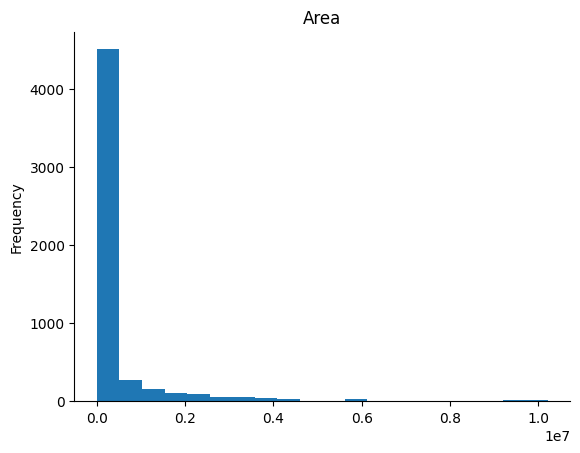

In [77]:
# @title Area

from matplotlib import pyplot as plt
dataset['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

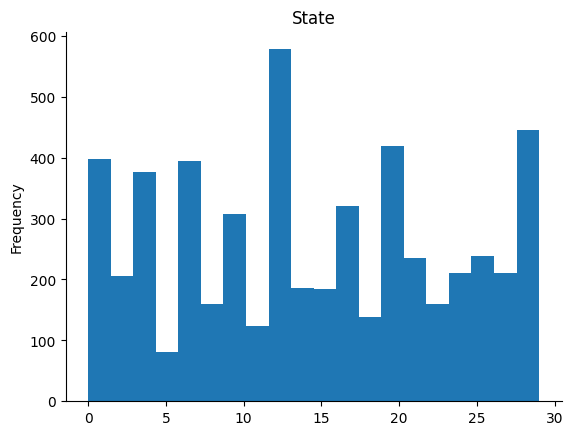

In [78]:
# @title State

from matplotlib import pyplot as plt
dataset['State'].plot(kind='hist', bins=20, title='State')
plt.gca().spines[['top', 'right',]].set_visible(False)

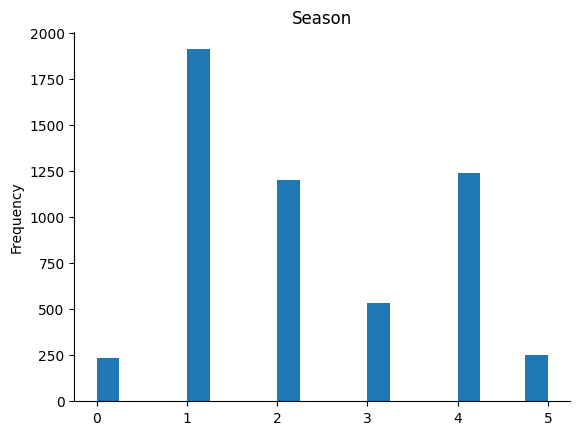

In [79]:
# @title Season

from matplotlib import pyplot as plt
dataset['Season'].plot(kind='hist', bins=20, title='Season')
plt.gca().spines[['top', 'right',]].set_visible(False)

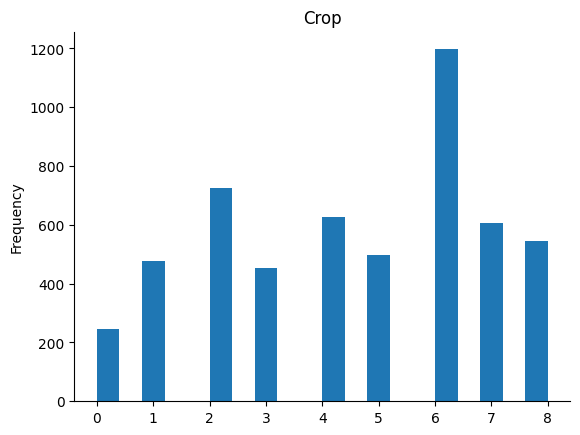

In [80]:
# @title Crop

from matplotlib import pyplot as plt
dataset['Crop'].plot(kind='hist', bins=20, title='Crop')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Setting Feature and Target**

In [81]:
X = dataset.drop(dataset.columns[9], axis=1).values
y = dataset.iloc[:, 9].values

In [82]:
print(X)

[[1.00000e+00 1.00000e+00 2.00000e+00 ... 2.00000e+00 0.00000e+00
  3.37320e+03]
 [3.00000e+00 4.00000e+00 2.00000e+00 ... 1.00000e+00 2.00000e+00
  3.52070e+03]
 [4.00000e+00 4.00000e+00 2.00000e+00 ... 0.00000e+00 0.00000e+00
  2.95740e+03]
 ...
 [8.00000e+00 2.00000e+00 1.90000e+01 ... 1.00000e+00 0.00000e+00
  1.49270e+03]
 [6.00000e+00 1.00000e+00 1.00000e+01 ... 0.00000e+00 0.00000e+00
  1.68834e+03]
 [8.00000e+00 2.00000e+00 1.00000e+01 ... 2.00000e+00 0.00000e+00
  2.11583e+03]]


In [83]:
print(X.shape)
print(dataset.shape)

(5373, 10)
(5373, 11)


In [84]:
dataset.describe()

,Crop,Season,State,Area,Soil Type,Pesticide Usage,pH,Temperature,Fertilizer Usage,Price,Rainfall
count,5373.000000,5373.000000,5373.000000,5.373000e+03,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000
mean,4.479248,2.257212,14.326447,3.945389e+05,1.189652,0.496743,0.986972,1.006886,0.988647,2553.190129,1496.015241
std,2.354276,1.381489,8.769971,1.060867e+06,1.192536,0.500036,0.824410,0.821204,0.812265,483.719734,878.539097
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1005.000000,62.300000
25%,2.000000,1.000000,7.000000,2.590000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2297.975728,852.500000
50%,5.000000,2.000000,14.000000,2.259600e+04,1.000000,0.000000,1.000000,1.000000,1.000000,2508.496079,1218.400000
75%,6.000000,4.000000,21.000000,2.110000e+05,2.000000,1.000000,2.000000,2.000000,2.000000,2733.320514,2068.050000
max,8.000000,5.000000,29.000000,1.021652e+07,3.000000,1.000000,2.000000,2.000000,2.000000,4983.000000,6331.100000


data will have to be normalised

In [85]:
dataset.shape

(5373, 11)

19689 rows and 10 columns

In [86]:
dataset.isnull().sum()

,0
Crop,0
Season,0
State,0
Area,0
Soil Type,0
Pesticide Usage,0
pH,0
Temperature,0
Fertilizer Usage,0
Price,0


there are no missing values after all

<Axes: >

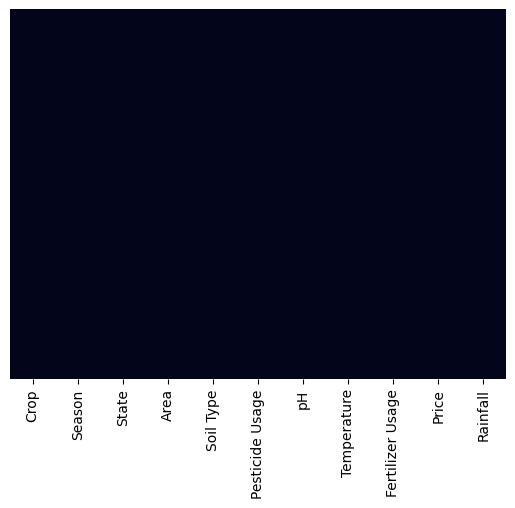

In [87]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

visualisation of null values

# Check correlation of the feature with target -- 'label'

In [88]:
print(dataset.corr(numeric_only=True)['Price'].abs().sort_values(ascending=False))

Price               1.000000
Rainfall            0.058002
Season              0.045035
Crop                0.036348
Area                0.022459
Temperature         0.019661
pH                  0.017505
Pesticide Usage     0.014358
State               0.013894
Soil Type           0.008964
Fertilizer Usage    0.005742
Name: Price, dtype: float64


The correlation with the target ranges from weak to moderate.Rainfall doesn't seem to have much affect on each yield

Text(0.5, 1.0, 'correlation between variables')

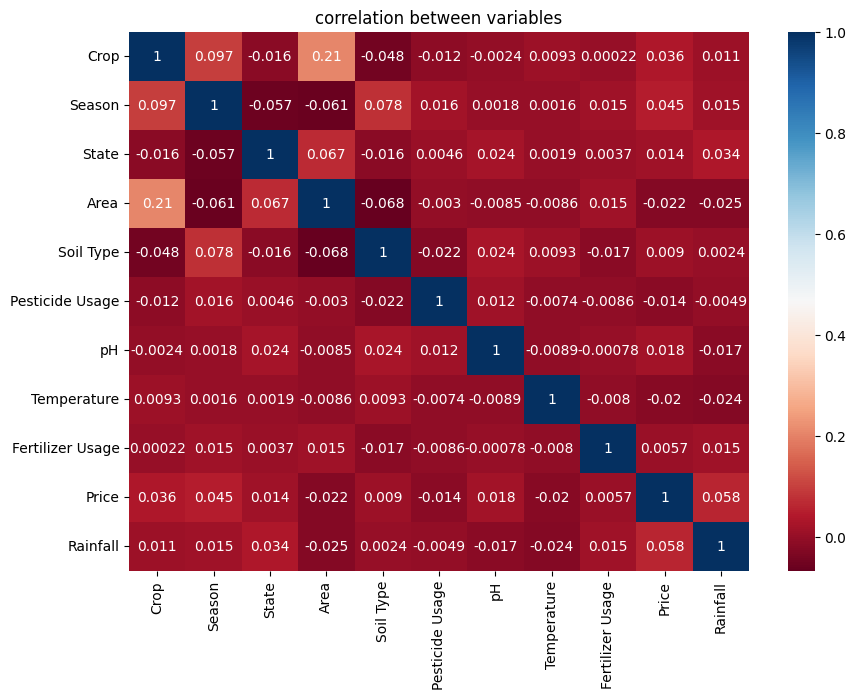

In [89]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(numeric_only=True),annot=True,cmap="RdBu")
plt.title('correlation between variables')

Here the effect on costCultivation and costCultivation2 is nearly identical so lets drop costCultivation2

# Data Visualization

# Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [91]:
print (X)

[[-1.47797946 -0.91012563 -1.40565956 ...  1.20945163 -1.21726168
   2.13691056]
 [-0.62838241  1.26164565 -1.40565956 ... -0.00838638  1.24521837
   2.30481854]
 [-0.20358388  1.26164565 -1.40565956 ... -1.22622439 -1.21726168
   1.6635808 ]
 ...
 [ 1.49561022 -0.18620187  0.53295361 ... -0.00838638 -1.21726168
  -0.00377394]
 [ 0.64601317 -0.91012563 -0.49337101 ... -1.22622439 -1.21726168
   0.21893466]
 [ 1.49561022 -0.18620187 -0.49337101 ...  1.20945163 -1.21726168
   0.70557184]]


# Split the dataset into training set and test set

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [93]:
print(X_train)

[[ 1.49561022 -0.18620187  0.64698967 ... -0.00838638  1.24521837
  -0.71866352]
 [-1.47797946 -0.91012563  0.30488147 ... -0.00838638  0.01397834
   1.02780718]
 [ 1.49561022 -0.18620187  0.07680933 ...  1.20945163  1.24521837
   2.16275131]
 ...
 [-0.20358388  0.53772189  0.30488147 ... -1.22622439  1.24521837
   0.0711301 ]
 [-0.20358388  1.26164565  1.55927822 ... -1.22622439 -1.21726168
   1.02382292]
 [ 0.22121464 -0.18620187 -1.6337317  ... -0.00838638 -1.21726168
  -0.73243766]]


In [94]:
print(y_train)

[2725.867324 2817.340302 2840.430584 ... 2955.526609 2467.242072
 2344.559783]


In [95]:
print(X_test)

[[-1.47797946 -0.91012563 -0.03722674 ... -0.00838638  1.24521837
   1.05490013]
 [-1.47797946 -0.91012563  1.67331429 ...  1.20945163  1.24521837
   2.45781402]
 [-0.20358388 -0.91012563 -0.49337101 ...  1.20945163 -1.21726168
   0.02884006]
 ...
 [ 0.22121464  1.98556942  0.64698967 ...  1.20945163 -1.21726168
   1.13922978]
 [ 1.07081169  1.26164565 -1.06355136 ... -0.00838638  1.24521837
   0.66221174]
 [-0.20358388 -0.18620187  0.41891754 ... -1.22622439 -1.21726168
  -1.08373532]]


In [96]:
print(y_test)

[2087.455182 2879.89908  2394.063946 ... 4140.       1998.408258
 2688.423609]




---



## Training on Different models

# 1.A Random Forest model

In [97]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100,random_state=0)
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [98]:
RF_y_pred = RF.predict(X_test)
print(RF_y_pred)

[2374.03396405 2687.02624951 2436.00521137 ... 3523.70892147 2868.42663173
 2360.88157444]


In [99]:
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_mae = mean_absolute_error(y_test, RF_y_pred)
RF_r2 = r2_score(y_test, RF_y_pred)

print("Mean Squared Error:", RF_mse)
print("Mean Absolute Error:", RF_mae)
print("R² Score:", RF_r2)

Mean Squared Error: 223608.25660405014
Mean Absolute Error: 333.4815675670697
R² Score: -0.1003600081209941


predicting a new result


In [100]:
RF_encoded_result = RF.predict(sc.transform([[1,1,2,1739,1,1,0,2,0,3373.2]]))

In [101]:
print(RF_encoded_result)

[2476.67108813]


predicted value - 2476.2886566

real value - 2490.092421

Applying K-Fold cross validation

In [102]:
RF_r2_scores = cross_val_score(estimator=RF, X=X_train, y=y_train, cv=10, scoring='r2')
print("Average R²:", RF_r2_scores.mean())

Average R²: -0.006274281439739138


# 2.A Decision Tree Model

In [103]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion='poisson',max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state = 0)
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=5,
                      min_samples_split=10, random_state=0)

In [104]:
DT_y_pred = DT.predict(X_test)

In [105]:
DT_mse = mean_squared_error(y_test,DT_y_pred)
DT_mae = mean_absolute_error(y_test,DT_y_pred)
DT_r2 = r2_score(y_test,DT_y_pred)

print("Mean Squared Error:", DT_mse)
print("Mean Absolute Error:", DT_mae)
print("R² Score:", DT_r2)

Mean Squared Error: 207007.5454560412
Mean Absolute Error: 317.711015478169
R² Score: -0.01866911293199003


In [106]:
DT_encoded_result = DT.predict(sc.transform([[1,1,2,1739,1,1,0,2,0,3373.2]]))

In [107]:
print(DT_encoded_result)

[2571.11708683]


predicted value - 2544.2886566

real value - 2490.092421

Applying K-Fold cross validation

In [108]:
DT_r2_scores = cross_val_score(estimator = DT, X = X_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", DT_r2_scores.mean())

Average R²: -0.025291414108530374


# 3.A Polynomial Regression model

In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

LinearRegression()

In [110]:
poly_y_pred = lin_reg.predict(X_poly_test)

In [111]:
poly_mse = mean_squared_error(y_test,poly_y_pred)
poly_mae = mean_absolute_error(y_test,poly_y_pred)
poly_r2 = r2_score(y_test,poly_y_pred)

print("Mean Squared Error:", poly_mse)
print("Mean Absolute Error:", poly_mae)
print("R² Score:", poly_r2)

Mean Squared Error: 202593.22853124552
Mean Absolute Error: 311.253359780603
R² Score: 0.003053420399227069


### predicting new result

In [112]:
scaled_result = sc.transform([[1,1,2,1739,1,1,0,2,0,3373.2]])

In [113]:
new_poly = poly_reg.transform(scaled_result)

In [114]:
print(lin_reg.predict(new_poly))

[2502.38302629]


predicted value - 2544.2886566

real value - 2490.092421

Applying K-Fold Cross validation

In [115]:
poly_r2_scores = cross_val_score(estimator = lin_reg, X = X_poly_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", poly_r2_scores.mean())

Average R²: 0.002234272146666849


# 4. A SVC model

In [116]:
from sklearn.svm import SVR
SVM = SVR(kernel = 'linear')
SVM.fit(X_train,y_train)

SVR(kernel='linear')

In [117]:
SVM_y_pred = SVM.predict(X_test)

In [118]:
SVM_mse = mean_squared_error(y_test,SVM_y_pred)
SVM_mae = mean_absolute_error(y_test,SVM_y_pred)
SVM_r2 = r2_score(y_test,SVM_y_pred)

print("Mean Squared Error:", SVM_mse)
print("Mean Absolute Error:", SVM_mae)
print("R² Score:", SVM_r2)

Mean Squared Error: 204066.26500523434
Mean Absolute Error: 302.41695238330755
R² Score: -0.004195285221473721


predicting a new result

In [119]:
SVM_encoded_result =SVM.predict(sc.transform([[1,1,2,1739,1,1,0,2,0,3373.2]]))

In [120]:
print(SVM_encoded_result)

[2511.25321738]


predicted value - 2544.2886566

real value - 2490.092421

Applying K-Fold cross validation

In [121]:
SVM_r2_scores = cross_val_score(estimator = SVM, X = X_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", SVM_r2_scores.mean())

Average R²: -0.012015760668778441


# 5. K Nearest Neighbors Model

In [122]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 15)
KNN.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [123]:
KNN_y_pred = KNN.predict(X_test)

In [124]:
KNN_mse = mean_squared_error(y_test,KNN_y_pred)
KNN_mae = mean_absolute_error(y_test,KNN_y_pred)
KNN_r2 = r2_score(y_test,KNN_y_pred)

print("Mean Squared Error:", KNN_mse)
print("Mean Absolute Error:", KNN_mae)
print("R² Score:", KNN_r2)

Mean Squared Error: 212565.2818629455
Mean Absolute Error: 321.2718389219225
R² Score: -0.04601833058035476


predicting new result

In [125]:
KNN_encoded_result = KNN.predict(sc.transform([[1,1,2,1739,1,1,0,2,0,3373.2]]))

In [126]:
print(KNN_encoded_result)

[2585.845608]


predicted value - 2544.2886566

real value - 2490.092421

Applying K-Fold cross validation

In [127]:
KNN_r2_scores = cross_val_score(estimator = KNN, X = X_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", KNN_r2_scores.mean())

Average R²: -0.06143852584271468


# 6.A XGBoost Model

In [128]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [129]:
XGB_y_pred = XGB.predict(X_test)

In [130]:
XGB_mse = mean_squared_error(y_test, XGB_y_pred)
XGB_mae = mean_absolute_error(y_test, XGB_y_pred)
XGB_r2 = r2_score(y_test, XGB_y_pred)

print("Mean Squared Error:", XGB_mse)
print("Mean Absolute Error:", XGB_mae)
print("R² Score:", XGB_r2)

Mean Squared Error: 253525.29496340902
Mean Absolute Error: 362.15332124690406
R² Score: -0.24757958342653308


predicting a new result

In [131]:
XGB_encoded_result = XGB.predict(sc.transform([[1,1,2,1739,1,1,0,2,0,3373.2]]))

In [132]:
print(XGB_encoded_result)

[2459.5664]


predicted value - 2544.2886566

real value - 2490.092421

Applying K-Fold cross validation

In [133]:
XGB_r2_scores = cross_val_score(estimator=XGB, X=X_train, y=y_train, cv=10, scoring='r2')
print("Average R²:", XGB_r2_scores.mean())

Average R²: -0.14855169412999358


# Summary of scores

In [134]:
scores = [RF_r2_scores,DT_r2_scores,poly_r2_scores,SVM_r2_scores,KNN_r2_scores,XGB_r2_scores]
algorithms = ["Random Forest","Decision Tree","polynomial Regression","Support Vector Machine","K-Nearest Neighbors","XGBoost"]

for i in range(len(algorithms)):
  print(f"The average r2 score achieved using the {algorithms[i]} is : {scores[i].mean():.2f}%")

The average r2 score achieved using the Random Forest is : -0.01%
The average r2 score achieved using the Decision Tree is : -0.03%
The average r2 score achieved using the polynomial Regression is : 0.00%
The average r2 score achieved using the Support Vector Machine is : -0.01%
The average r2 score achieved using the K-Nearest Neighbors is : -0.06%
The average r2 score achieved using the XGBoost is : -0.15%


# A comparison of the accuracy of the seven models

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

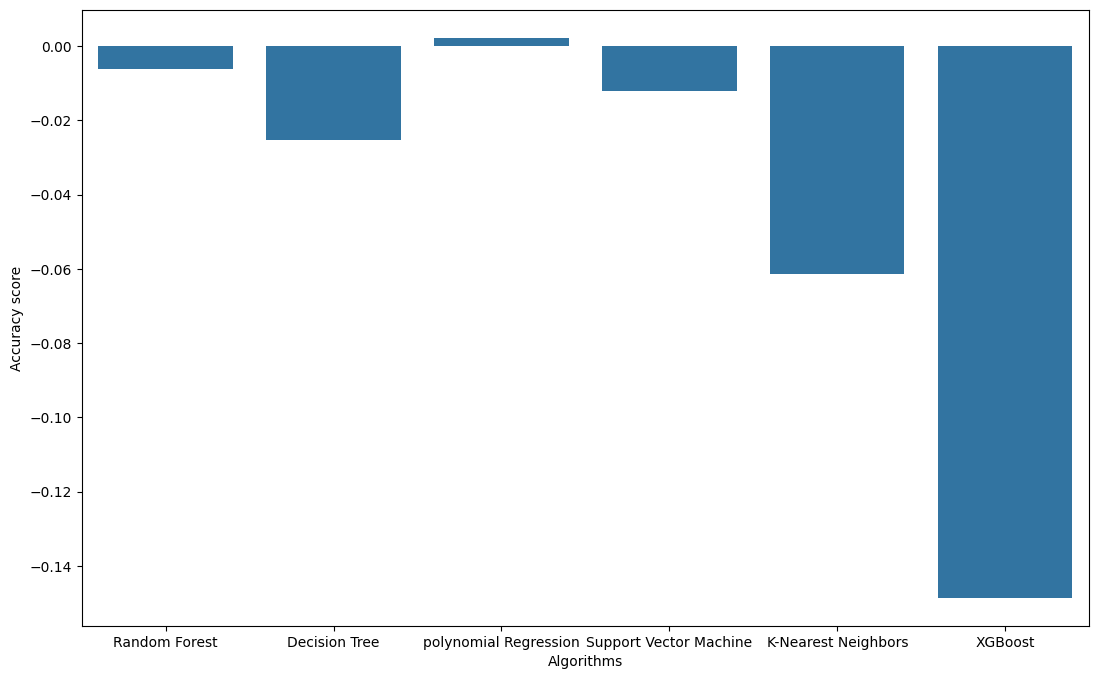

In [135]:
plt.figure(figsize=(13,8))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

mean_scores = [score.mean() for score in scores]

sns.barplot(x=algorithms, y=mean_scores)

# Making a predictive system

In [136]:
input_data = (1,1,2,1739,1,1,0,2,0,3373.2)

# changing the input_data to numpy array and reshaping
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

scaled_input = sc.transform(input_data_reshaped)

prediction = RF.predict(scaled_input)
print(prediction)

[2476.67108813]


# Saving the trained model

In [137]:
import pickle
import joblib

In [148]:
# Save
joblib.dump(RF, "Price_predictor.joblib",compress=3)
pickle.dump(sc,open('Scaler(PP).sav','wb'))
joblib.dump(le, "label_encoder(PP).joblib")

['label_encoder(PP).joblib']

In [145]:
#loading the saved model
loaded_model = joblib.load("Price_predictor.joblib")
loaded_scaler = pickle.load(open('Scaler(PP).sav','rb'))
loaded_le = joblib.load("label_encoder(PP).joblib")

In [147]:
input_data = (1,1,2,1739,1,1,0,2,0,3373.2)

# changing the input_data to numpy array and reshaping
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

scaled_input = loaded_scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(scaled_input)
print(prediction)

[2476.67108813]
